In [1]:
import fbprophet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("/content/carbon monoxide.xlsx")
df = df[['Sensor Value']]
df

,Sensor Value
0,637
1,637
2,634
3,637
4,631
...,...
1018,835
1019,835
1020,831
1021,831


In [ ]:
Days = pd.date_range(start="2017-09-07",end="2020-06-25")
dataframe = pd.DataFrame()
dataframe['ds'] = Days
dataframe['ds'] = dataframe['ds'].dt.date
dataframe['y'] = df[['Sensor Value']]
dataframe

,ds,y
0,2017-09-07,637
1,2017-09-08,637
2,2017-09-09,634
3,2017-09-10,637
4,2017-09-11,631
...,...,...
1018,2020-06-21,835
1019,2020-06-22,835
1020,2020-06-23,831
1021,2020-06-24,831


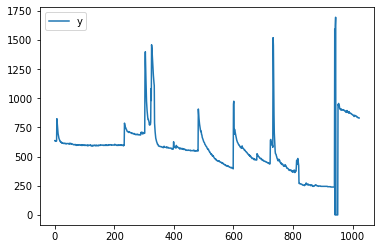

In [ ]:
dataframe.plot()

In [ ]:
from fbprophet import Prophet
size = (70/100) * len(dataframe)
train = dataframe[0:int(size)]
test = dataframe[int(size):]
model = Prophet()

In [ ]:
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
futureDates = model.make_future_dataframe(periods=len(test))
predictions = model.predict(futureDates)
predictions = predictions.tail(len(test))
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
716,2019-08-24,481.047879,346.395790,611.917434,481.047879,481.047879,-0.551129,-0.551129,-0.551129,-0.551129,-0.551129,-0.551129,0.0,0.0,0.0,480.496750
717,2019-08-25,480.745950,357.815791,626.260070,480.745950,480.745950,3.978495,3.978495,3.978495,3.978495,3.978495,3.978495,0.0,0.0,0.0,484.724444
718,2019-08-26,480.444021,365.073453,616.586382,480.444021,480.444021,0.664422,0.664422,0.664422,0.664422,0.664422,0.664422,0.0,0.0,0.0,481.108442
719,2019-08-27,480.142092,351.416493,614.371926,480.142092,480.142092,2.530982,2.530982,2.530982,2.530982,2.530982,2.530982,0.0,0.0,0.0,482.673074
720,2019-08-28,479.840163,339.589057,613.456883,479.840163,479.840163,-0.148472,-0.148472,-0.148472,-0.148472,-0.148472,-0.148472,0.0,0.0,0.0,479.691691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2020-06-21,389.865342,146.537686,641.423677,187.271726,591.722625,3.978495,3.978495,3.978495,3.978495,3.978495,3.978495,0.0,0.0,0.0,393.843837
1019,2020-06-22,389.563413,153.388885,626.360791,185.538836,592.445454,0.664422,0.664422,0.664422,0.664422,0.664422,0.664422,0.0,0.0,0.0,390.227835
1020,2020-06-23,389.261484,155.199021,635.703124,184.875051,593.053751,2.530982,2.530982,2.530982,2.530982,2.530982,2.530982,0.0,0.0,0.0,391.792466
1021,2020-06-24,388.959555,144.407560,642.908168,184.149532,593.775613,-0.148472,-0.148472,-0.148472,-0.148472,-0.148472,-0.148472,0.0,0.0,0.0,388.811083


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test[['y']],predictions[['yhat']])
mse

96212.9823105947

In [ ]:
import pickle
import pickle
with open('/content/carbonmonoxide_model_fbprohpet.pkl', 'wb') as fid:
    pickle.dump(model, fid)

In [ ]:
preds = predictions['yhat'].tolist()

In [ ]:
forecasting={
    
    'Day-1':preds[0],
    'Day-2':preds[1],
    'Day-3':preds[2],
    'Day-4':preds[3],
    'Day-5':preds[4],
    'Day-6':preds[5],
    'Day-7':preds[6],
    'MSE': mse
}

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
cred = credentials.Certificate("../config/sensors-forecasting-fc27d-firebase-adminsdk-krgvi-403182645e.json")
firebase_admin.initialize_app(cred,{'databaseURL':'https://sensors-forecasting-fc27d-default-rtdb.firebaseio.com/'})
ref = db.reference("/Models/fbProphet")
upload_ref = ref.child('Carbonmonoxide')
upload_ref.update(forecasting)